In [1]:
import scipy
from scipy.spatial import distance
import numpy as np
import math
import re
import matplotlib.pyplot as plt

# Задача 1: сравнение предложений

Дан набор предложений, скопированных с Википедии. Каждое из них имеет "кошачью тему" в одном из трех смыслов:

* кошки (животные)
* UNIX-утилита cat для вывода содержимого файлов
* версии операционной системы OS X, названные в честь семейства кошачьих


Ваша **задача** — найти два предложения, которые ближе всего по смыслу к расположенному в самой первой строке. В качестве меры близости по смыслу мы будем использовать косинусное расстояние.

**Выполните следующие шаги:**

1. Скачайте файл с предложениями (sentences.txt).
2. Каждая строка в файле соответствует одному предложению. Считайте их, приведите каждую к нижнему регистру с помощью строковой функции lower().
3. Произведите токенизацию, то есть разбиение текстов на слова. Для этого можно воспользоваться регулярным выражением, которое считает разделителем любой символ, не являющийся буквой: re.split('[^a-z]', t). Не забудьте удалить пустые слова после разделения.
4. Составьте список всех слов, встречающихся в предложениях. Сопоставьте каждому слову индекс от нуля до (d - 1), где d — число различных слов в предложениях. Для этого удобно воспользоваться структурой dict.
5. Создайте матрицу размера n * d, где n — число предложений. Заполните ее: элемент с индексом (i, j) в этой матрице должен быть равен количеству вхождений j-го слова в i-е предложение. У вас должна получиться матрица размера 22 * 254.
6. Найдите косинусное расстояние от предложения в самой первой строке (In comparison to dogs, cats have not undergone...) до всех остальных с помощью функции scipy.spatial.distance.cosine. Какие номера у двух предложений, ближайших к нему по этому расстоянию (строки нумеруются с нуля)? Эти два числа и будут ответами на задание. Само предложение (In comparison to dogs, cats have not undergone... ) имеет индекс 0.
7. Запишите полученные числа в файл, разделив пробелом. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (submission-1.txt).
8.Совпадают ли ближайшие два предложения по тематике с первым? Совпадают ли тематики у следующих по близости предложений?

Разумеется, использованный вами метод крайне простой. Например, он не учитывает формы слов (так, cat и cats он считает разными словами, хотя по сути они означают одно и то же), не удаляет из текстов артикли и прочие ненужные слова. Позже мы будем подробно изучать анализ текстов, где выясним, как достичь высокого качества в задаче поиска похожих предложений.

In [2]:
txt = open('sentences.txt', 'r')

In [3]:
lines = []
for line in open('sentences.txt', 'r'):
  lines.append(line.lower())

In [4]:
regexp = re.compile('[^a-z]')
wordsinsentences = [[word for word in re.split(regexp, line) if word] for line in lines]

In [5]:
txt = open('sentences.txt', 'r')
text = txt.read()
text = text.lower()
text = re.split('[^a-z]', text)
text = set(text)
text.remove('')
words = dict(zip(text, range(len(text))))
len(words)

254

In [6]:
matrix = np.zeros((len(lines), len(words)))
matrix.shape

(22, 254)

In [7]:
for i in range(len(lines)):
  for word in wordsinsentences[i]:
    matrix[i][words[word]] += 1

In [8]:
cos_dist = []
for i in range(len(lines)):
  cos_dist.append(distance.cosine(matrix[0], matrix[i]))
cos_dist

[0.0,
 0.9527544408738466,
 0.8644738145642124,
 0.8951715163278082,
 0.7770887149698589,
 0.9402385695332803,
 0.7327387580875756,
 0.9258750683338899,
 0.8842724875284311,
 0.9055088817476932,
 0.8328165362273942,
 0.8804771390665607,
 0.8396432548525454,
 0.8703592552895671,
 0.8740118423302576,
 0.9442721787424647,
 0.8406361854220809,
 0.956644501523794,
 0.9442721787424647,
 0.8885443574849294,
 0.8427572744917122,
 0.8250364469440588]

In [9]:
sorted_distances = sorted(cos_dist)
sorted_distances

[0.0,
 0.7327387580875756,
 0.7770887149698589,
 0.8250364469440588,
 0.8328165362273942,
 0.8396432548525454,
 0.8406361854220809,
 0.8427572744917122,
 0.8644738145642124,
 0.8703592552895671,
 0.8740118423302576,
 0.8804771390665607,
 0.8842724875284311,
 0.8885443574849294,
 0.8951715163278082,
 0.9055088817476932,
 0.9258750683338899,
 0.9402385695332803,
 0.9442721787424647,
 0.9442721787424647,
 0.9527544408738466,
 0.956644501523794]

In [10]:
np.where(cos_dist == sorted_distances[1])[0][0], np.where(cos_dist == sorted_distances[2])[0][0]

(6, 4)

**ОТВЕТ:**
4 6

# Задача 2

Рассмотрим сложную математическую функцию на отрезке [1, 15]:

f(x) = sin(x / 5) * exp(x / 10) + 5 * exp(-x / 2)

Она может описывать, например, зависимость оценок, которые выставляют определенному сорту вина эксперты, в зависимости от возраста этого вина. По сути, задача машинного обучения состоит в том, чтобы приблизить сложную зависимость с помощью функции из определенного семейства. В этом задании мы будем приближать указанную функцию с помощью многочленов.

Как известно, многочлен степени n (то есть $w_0 + w_1 x + w_2 x^2 + ... + w_n x^n$) однозначно определяется любыми n + 1 различными точками, через которые он проходит. Это значит, что его коэффициенты $w_0, ... w_n$ можно определить из следующей системы линейных уравнений:

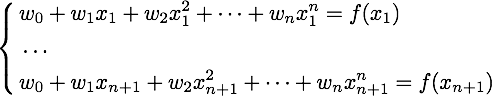




где через $x_1, ..., x_n, x_{n+1}$ обозначены точки, через которые проходит многочлен, а через $f(x_1), ..., f(x_n), f(x_{n+1})$ — значения, которые он должен принимать в этих точках.

Воспользуемся описанным свойством, и будем находить приближение функции многочленом, решая систему линейных уравнений.

1. Сформируйте систему линейных уравнений (то есть задайте матрицу коэффициентов A и свободный вектор b) для многочлена первой степени, который должен совпадать с функцией f в точках 1 и 15. Решите данную систему с помощью функции *scipy.linalg.solve*. Нарисуйте функцию f и полученный многочлен. Хорошо ли он приближает исходную функцию?
2. Повторите те же шаги для многочлена второй степени, который совпадает с функцией f в точках 1, 8 и 15. Улучшилось ли качество аппроксимации?
3. Повторите те же шаги для многочлена третьей степени, который совпадает с функцией f в точках 1, 4, 10 и 15. Хорошо ли он аппроксимирует функцию? Коэффициенты данного многочлена (четыре числа в следующем порядке: $w_0, w_1, w_2, w_3$) являются ответом на задачу. Округлять коэффициенты не обязательно, но при желании можете произвести округление до второго знака (т.е. до числа вида 0.42)
4. Запишите полученные числа в файл, разделив пробелами. Обратите внимание, что файл должен состоять из одной строки, в конце которой не должно быть переноса. Пример файла с решением вы можете найти в конце задания (*submission-2.txt*).


In [11]:
def f(x):
  return np.sin(x / 5.) * np.exp(x / 10.) + 5. * np.exp(-x / 2.)

In [12]:
f(1), f(15)

(3.252216865271419, 0.6352214195786656)

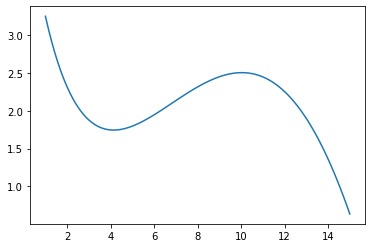

In [13]:
x = np.linspace(1,15,100)
plt.plot(x, f(x));

In [14]:
A = np.array([[1.,1.],[1., 15.]])
b = np.array([f(1.), f(15.)])

In [15]:
w0w1 = scipy.linalg.solve(A, b)
w0w1

array([ 3.43914511, -0.18692825])

In [16]:
A = np.array([[1.,1., 1.],[1., 8., 8.**2], [1., 15., 15.**2]])
b = np.array([f(1.), f(8.), f(15.)])
w0w1w2 = scipy.linalg.solve(A, b)
w0w1w2

array([ 3.32512949, -0.06531159, -0.00760104])

In [17]:
A = np.array([[1.,1., 1., 1.],[1., 4., 4.**2, 4.**3],
              [1., 10., 10.**2, 10.**3], [1., 15., 15**2, 15**3]])
b = np.array([f(1.), f(4.), f(10.), f(15.)])
w0w1w2w3 = scipy.linalg.solve(A, b)
w0w1w2w3

array([ 4.36264154, -1.29552587,  0.19333685, -0.00823565])

**ОТВЕТ:**
4.36, -1.3 ,  0.19, -0.01

In [18]:
w0w1w2w3=w0w1w2w3.round(2)
w0w1w2w3

array([ 4.36, -1.3 ,  0.19, -0.01])

In [19]:
def wx1(x):
  return w0w1[0] + w0w1[1] * x

def wx2(x):
  return w0w1w2[0] + w0w1w2[1] * x + w0w1w2[2] * x**2

def wx3(x):
  return w0w1w2w3[0] + w0w1w2w3[1] * x + w0w1w2w3[2] * x**2 + w0w1w2w3[3] * x**3

x = np.linspace(1,15,100)

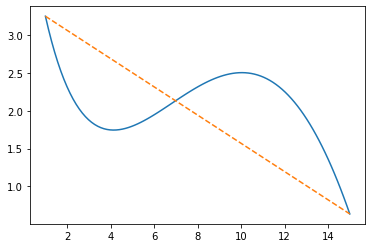

In [20]:
plt.plot(x, f(x), x, wx1(x), '--');

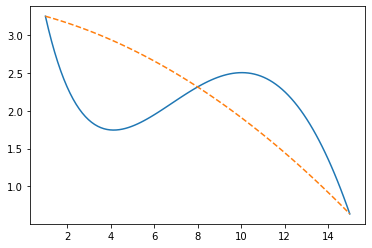

In [21]:
plt.plot(x, f(x), x, wx2(x), '--');

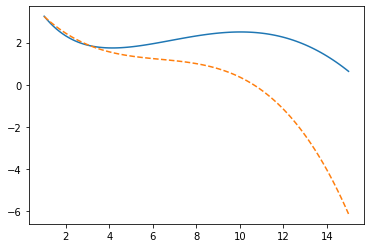

In [22]:
plt.plot(x, f(x), x, wx3(x), '--');